In [45]:
import re
import numpy as np
import pandas as pd
import missingno as mno

In [46]:
df = pd.read_csv('cleaned.csv')
df.head()

,address,areas,bathrooms,bedrooms,parking-spaces,zap_price_pmo,zap_price_cls,zap_price_iptu,latitude,longitude,street,neighborhood,r$_pmo,usd_pmo
0,"Rua João Barros Moreira, Recreio dos Bandeirantes",450 m²,7.0,4.0,3.0,R$ 5.000 /mês,condomínio R$ 1.242,IPTU R$ 481,-23.019739,-43.460044,Rua João Barros Moreira,Recreio dos Bandeirantes,5000,1162.23
1,"Rua João Pinheiro, Piedade",56 m²,2.0,2.0,1.0,R$ 1.300 /mês,condomínio R$ 460,IPTU R$ 60,-22.887174,-43.304125,Rua João Pinheiro,Piedade,1300,302.18
2,"Estrada dos Bandeirantes, Jacarepaguá",61 m²,2.0,2.0,1.0,R$ 1.380 /mês,condomínio R$ 600,IPTU R$ 89,-22.954847,-43.376590,Estrada dos Bandeirantes,Jacarepaguá,1380,320.78
3,"Rua Mário Covas Júnior, Barra da Tijuca",97 m²,3.0,2.0,1.0,R$ 2.950 /mês,condomínio R$ 852,IPTU R$ 315,-23.005646,-43.330188,Rua Mário Covas Júnior,Barra da Tijuca,2950,685.72
4,"Rua Coronel Paulo Malta Rezende, Barra da Tijuca",65 m²,2.0,2.0,1.0,R$ 2.400 /mês,condomínio R$ 809,IPTU R$ 218,-23.004934,-43.331217,Rua Coronel Paulo Malta Rezende,Barra da Tijuca,2400,557.87


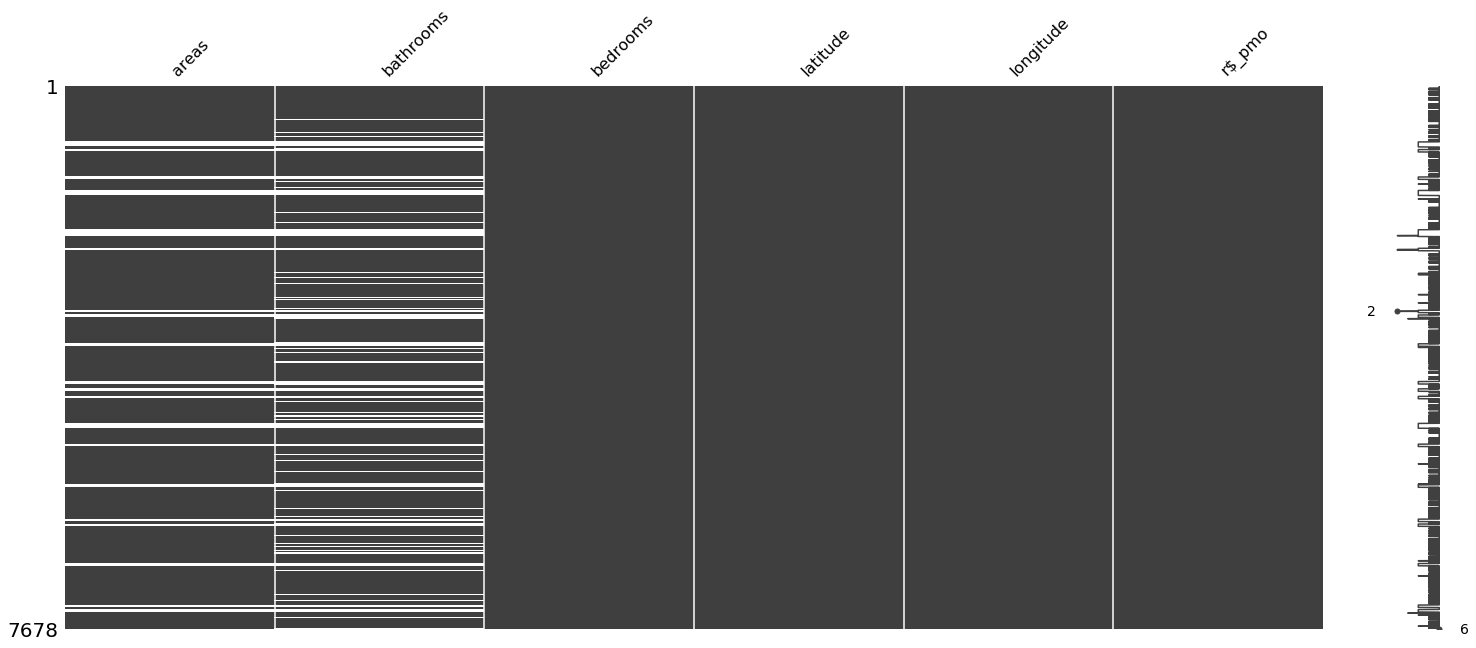

In [47]:
df.drop(columns=['address', 'parking-spaces', 'zap_price_pmo', 'zap_price_cls', 'zap_price_iptu',
                 'street', 'neighborhood', 'usd_pmo',
                ], inplace=True)
mno.matrix(df);

In [48]:
df.head()

,areas,bathrooms,bedrooms,latitude,longitude,r$_pmo
0,450 m²,7.0,4.0,-23.019739,-43.460044,5000
1,56 m²,2.0,2.0,-22.887174,-43.304125,1300
2,61 m²,2.0,2.0,-22.954847,-43.376590,1380
3,97 m²,3.0,2.0,-23.005646,-43.330188,2950
4,65 m²,2.0,2.0,-23.004934,-43.331217,2400


In [49]:
df.dtypes

areas         object
bathrooms    float64
bedrooms     float64
latitude     float64
longitude    float64
r$_pmo         int64
dtype: object

In [50]:
def parse_area(x):
    try: return int(x.split()[0])
    except: return np.nan
df['areas'] = df['areas'].apply(parse_area)

In [52]:
df.dtypes

areas        float64
bathrooms    float64
bedrooms     float64
latitude     float64
longitude    float64
r$_pmo         int64
dtype: object

In [53]:
df.head()

,areas,bathrooms,bedrooms,latitude,longitude,r$_pmo
0,450.0,7.0,4.0,-23.019739,-43.460044,5000
1,56.0,2.0,2.0,-22.887174,-43.304125,1300
2,61.0,2.0,2.0,-22.954847,-43.376590,1380
3,97.0,3.0,2.0,-23.005646,-43.330188,2950
4,65.0,2.0,2.0,-23.004934,-43.331217,2400


In [54]:
df.to_csv('cleaned_2.csv')